In [1]:
from Analyzor.DataFactory import DataFactory
from Analyzor import VertexAnalyzor
import pylab as plt
import matplotlib.path as mplPath
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataFactory('data/SQL/10C/0085_0005.db','data/SQL/10C/ProtoMap.db')
dp.InitT3()

0085_0005 initialization will take some time
0085_0005loading finished
0085_0005 begin processing
0085_0005 processing finished


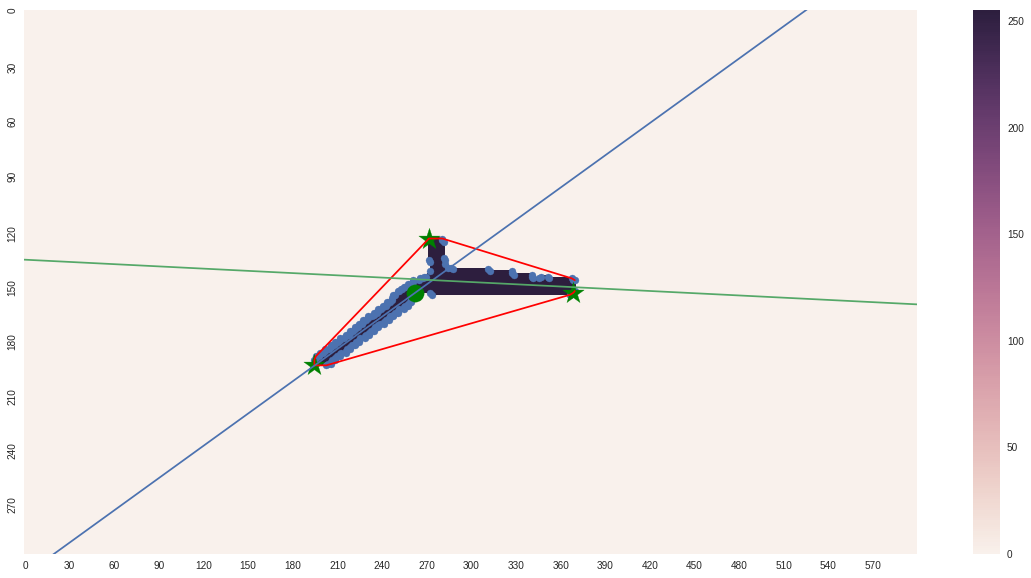

In [19]:


fig = plt.figure(figsize=(20,10))

image = dp.ConstructImage(15)
image = VertexAnalyzor.FilterBackground(image)
points,(xc,yc) = VertexAnalyzor.GetEventPositions(image,1)


r = VertexAnalyzor.GetEventInfo(points,(xc,yc))


In [26]:
points

array([[272, 174],
       [195, 104],
       [369, 144]], dtype=int32)

In [33]:
xs,ys = np.where(image)


xc,yc = 300,150

def GetD2(xm,ym):
    k = (yc-ym)/(xc-xm)
    b = (xc*ym-yc*xm)/(xc-xm)

    return np.power(xs*k+b-ys,2)/(k*k+1)


D2s = [GetD2(xm,ym) for xm,ym in points]

D2exp = np.exp(D2s)
print D2exp


[[ inf  inf  inf ...,  inf  inf  inf]
 [ inf  inf  inf ...,  inf  inf  inf]
 [ inf  inf  inf ...,  inf  inf  inf]]


/afs/crc.nd.edu/user/j/jlai1/.local/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


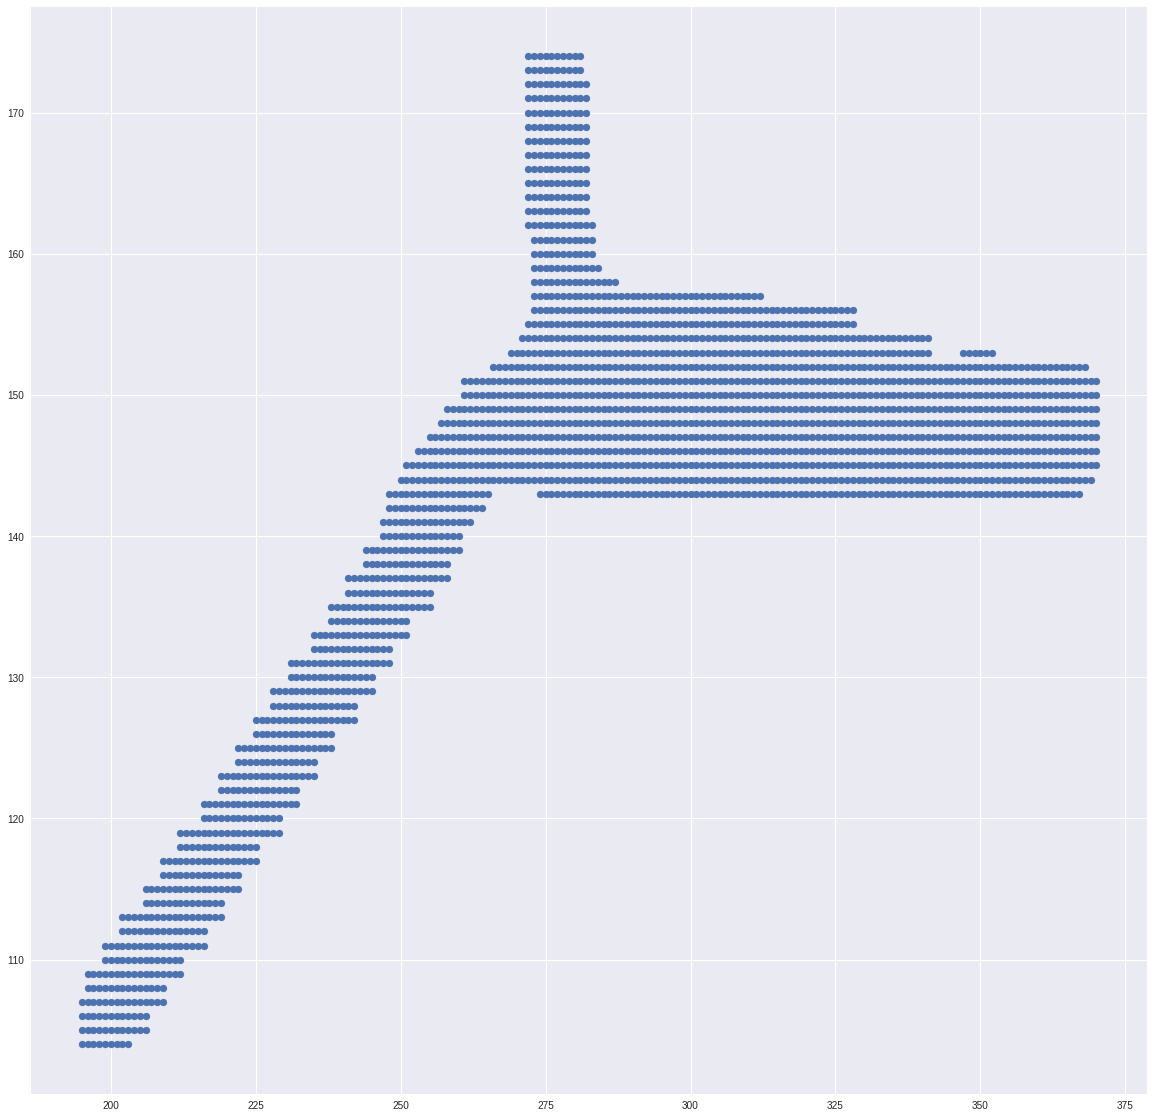

In [22]:
plt.scatter(ys,xs)